In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

import math
import sys

In [2]:
# %matplotlib qt5
%matplotlib inline
# %matplotlib ipympl

## Linear behaviour

In [3]:
path = '/home/elife/LabPh/LabPh-MRArray/3_Ring/lin/'
x = scipy.io.loadmat(path + 'x.mat',squeeze_me=True)['x']

#### File were saved swapped ####
# y_dr = scipy.io.loadmat('y_dr.mat')['y_dr']
y_th = scipy.io.loadmat(path + 'y_dr.mat',squeeze_me=True)['y_dr']
# y_th = scipy.io.loadmat('y_th.mat')['y_th']
y_dr = scipy.io.loadmat(path + 'y_th.mat',squeeze_me=True)['y_th']

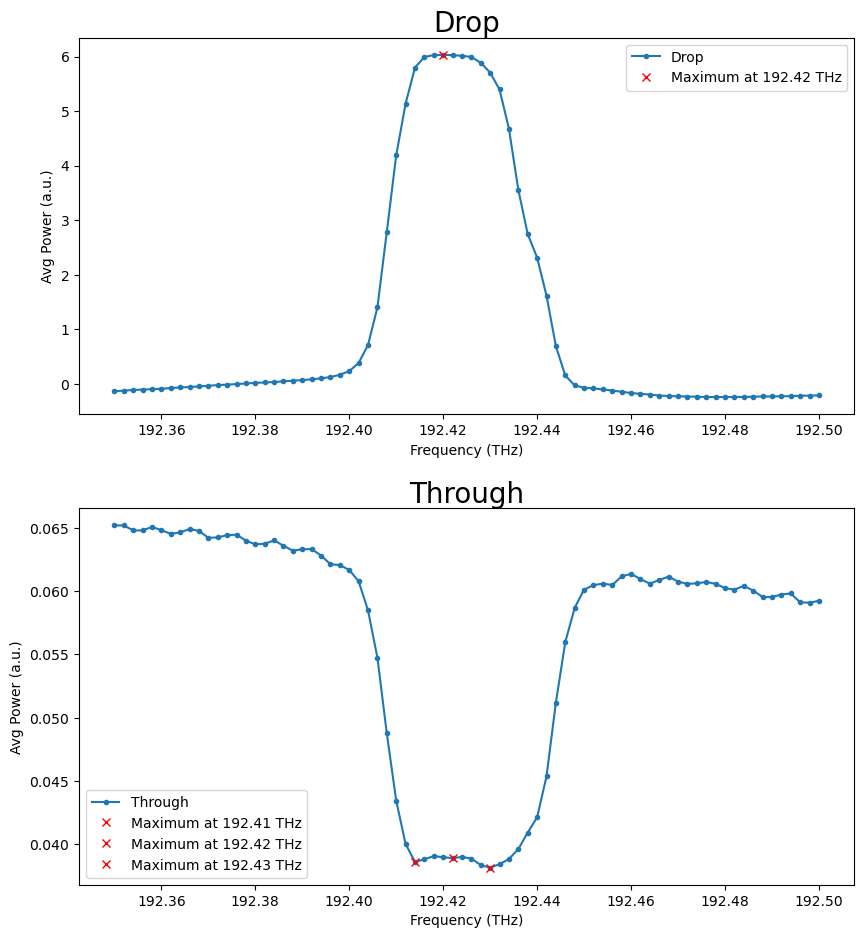

In [4]:
i_peak_dr, _ = find_peaks(y_dr, height=1)
i_peak_th, _ = find_peaks(-y_th, height=-0.04)

fig, ax = plt.subplots(2,1, figsize = (10,11))
fig.subplots_adjust(hspace=0.25)

ax[0].plot(x,y_dr,'.-',label='Drop')
for ii in i_peak_dr:
    ax[0].plot(x[ii], y_dr[ii], 'rx', label='Maximum at %.2f THz' % x[ii])
ax[0].set_title('Drop', fontsize=20, pad=1.0)

ax[1].plot(x,y_th,'.-',label='Through')
for ii in i_peak_th:
    ax[1].plot(x[ii], y_th[ii], 'rx', label='Maximum at %.2f THz' % x[ii])
ax[1].set_title('Through', fontsize=20, pad=1.0)

for ii in [0,1]:
    ax[ii].set_xlabel('Frequency (THz)')
    ax[ii].set_ylabel('Avg Power (a.u.)')
    ax[ii].legend()

plt.show()

## Non linear behaviour

In [5]:
path = '/home/elife/LabPh/LabPh-MRArray/3_Ring/non-lin/'
x = scipy.io.loadmat(path + 'x.mat',squeeze_me=True)['x']

#### File were saved swapped ####
# y_dr = scipy.io.loadmat('y_dr.mat')['y_dr']
y_th = scipy.io.loadmat(path + 'y_dr.mat',squeeze_me=True)['y_dr']
# y_th = scipy.io.loadmat('y_th.mat')['y_th']
y_dr = scipy.io.loadmat(path + 'y_th.mat',squeeze_me=True)['y_th']

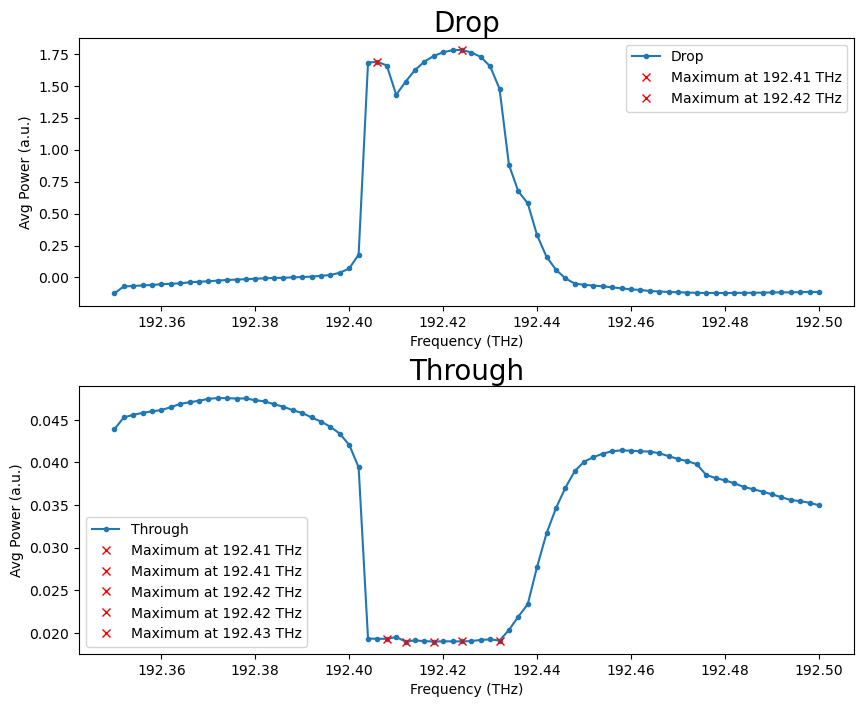

In [6]:
i_peak_dr, _ = find_peaks(y_dr, height=1)
i_peak_th, _ = find_peaks(-y_th, height=-0.04)

fig, ax = plt.subplots(2,1, figsize = (10,8))
fig.subplots_adjust(hspace=0.3)

ax[0].plot(x,y_dr,'.-',label='Drop')
for ii in i_peak_dr:
    ax[0].plot(x[ii], y_dr[ii], 'rx', label='Maximum at %.2f THz' % x[ii])
ax[0].set_title('Drop', fontsize=20, pad=1.0)

ax[1].plot(x,y_th,'.-',label='Through')
for ii in i_peak_th:
    ax[1].plot(x[ii], y_th[ii], 'rx', label='Maximum at %.2f THz' % x[ii])
ax[1].set_title('Through', fontsize=20, pad=1.0)

for ii in [0,1]:
    ax[ii].set_xlabel('Frequency (THz)')
    ax[ii].set_ylabel('Avg Power (a.u.)')
    ax[ii].legend()

plt.show()

## Time response at different powers and frequencies

In [7]:
path = '/home/elife/LabPh/LabPh-MRArray/3_Ring/structure_3_2023-12-20_12-12/'

params = scipy.io.loadmat(path + f'Parameters_SPmapNoMod_2outs.mat',squeeze_me=True)
freq_sweep = params['laserfreq_sweep']
pow_sweep = params['VOAin_pwr_sweep']
params['sampling_step_approx']

1e-09

Plot the measurment at different frequencies and powers.

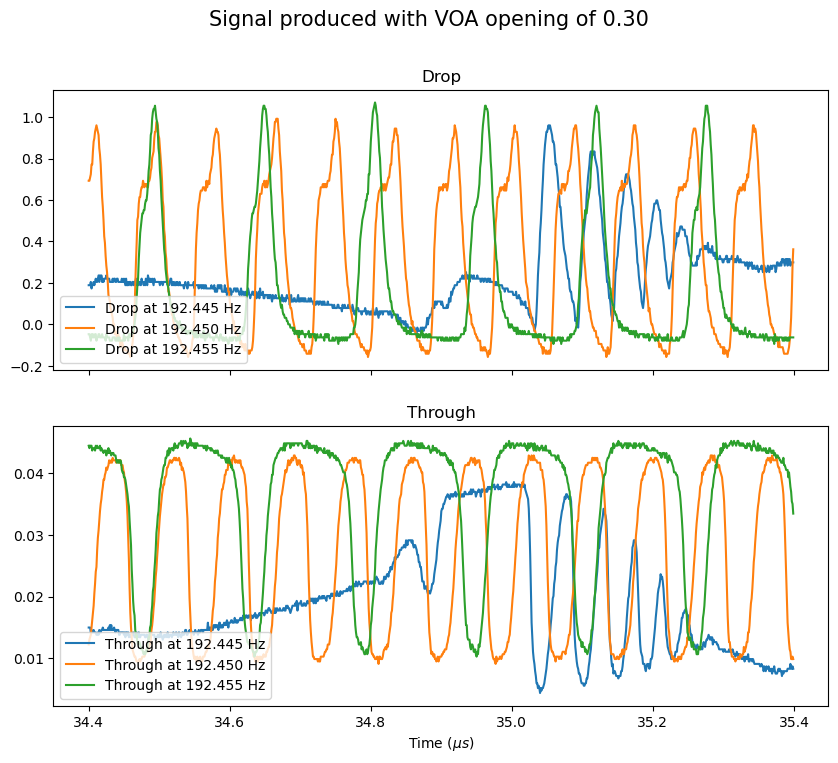

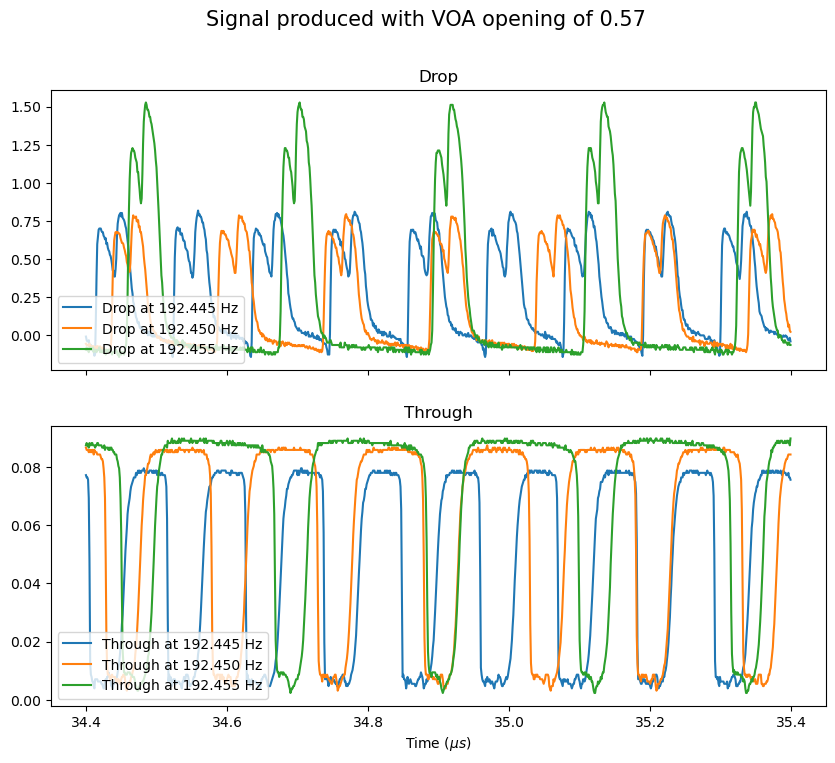

In [8]:
begin = 34400
end = 35400
sampling = 1e-03
time = np.arange(begin * sampling, end * sampling, sampling)

for pow in [4, 8]: # 15
    fig, ax = plt.subplots(2,1, figsize = (10,8))
    
    for freq in range(14,17): # 18
        y_dr = scipy.io.loadmat(path + f'SPmapNoMod_2outs_iFreq{freq}_iPow{pow}.mat',squeeze_me=True)['out_drop']
        y_th = scipy.io.loadmat(path + f'SPmapNoMod_2outs_iFreq{freq}_iPow{pow}.mat',squeeze_me=True)['out_through']

        fig.suptitle(F'Signal produced with VOA opening of %.2f' % pow_sweep[pow-1], fontsize=15)

        ax[0].set_title(f'Drop')
        ax[0].plot(time, y_dr[begin:end],label=f'Drop at %.3f Hz' % freq_sweep[freq+1])

        ax[1].set_title(f'Through')
        ax[1].plot(time, y_th[begin:end],label=f'Through at %.3f Hz' % freq_sweep[freq+1])

        for axs in ax.flat:
            axs.set(xlabel='Time ($\mu s$)')
            axs.legend(loc='lower left')

        # Hide x labels and tick labels for top plots and y ticks for right plots.
        for axs in ax.flat:
            axs.label_outer()

    plt.show()
    # plt.savefig(f'/home/elife/LabPh/RingArray/1_Ring/graph/Map_iPow{pow}')

In [9]:
plot = 0
write = not plot

drop_frequency = []
drop_prominence = []
through_frequency = []
through_prominence = []

if write:
    file_dr = open('/home/elife/LabPh/LabPh-MRArray/3_Ring/i_peak_dr.txt', 'w')
    file_th = open('/home/elife/LabPh/LabPh-MRArray/3_Ring/i_peak_th.txt', 'w')
    original_stdout = sys.stdout

for pow in range(1,len(pow_sweep)+1):
# for pow in [5]:
    for freq in range(1,len(freq_sweep)+1):
    # for freq in [11, 12,13,14]:
        y_dr = scipy.io.loadmat(path + f'SPmapNoMod_2outs_iFreq{freq}_iPow{pow}.mat',squeeze_me=True)['out_drop']

        ft_y_dr = np.fft.rfft(y_dr)
        ft_y_dr = abs(ft_y_dr)
        n_dr = y_dr.size
        timestep = 0.000000001
        frequency_dr = np.fft.rfftfreq(n_dr, d=timestep)

        i_peak_dr, properties_dr = find_peaks(abs(ft_y_dr), prominence=5)
        max_height_dr = max([abs(ft_y_dr[ii]) for ii in i_peak_dr])
        i_peak_dr, properties_dr = find_peaks(ft_y_dr, height=max_height_dr, prominence=1)
        drop_frequency += [frequency_dr[i_peak_dr]]
        drop_prominence += [properties_dr['prominences']]
        

        y_th = scipy.io.loadmat(path + f'SPmapNoMod_2outs_iFreq{freq}_iPow{pow}.mat',squeeze_me=True)['out_through']

        ft_y_th = np.fft.rfft(y_th)
        ft_y_th = abs(ft_y_th)
        n_th = y_th.size
        frequency_th = np.fft.rfftfreq(n_th, d=timestep)

        i_peak_th, properties_th = find_peaks(abs(ft_y_th),prominence=1)
        max_height_th = max([abs(ft_y_th[ii]) for ii in i_peak_th])
        i_peak_th, properties_th = find_peaks(ft_y_th, height=max_height_th, prominence=1)
        through_frequency += [frequency_th[i_peak_th]]
        through_prominence += [properties_th['prominences']]

        if plot:
            fig, ax = plt.subplots(2,2, figsize = (10,8))
            fig.subplots_adjust(hspace=0.3, wspace=0.3)
            ax[0][0].set_title(f'Drop at power {pow_sweep[pow-1]}')
            ax[0][0].plot(y_dr[34400:35400],label=f'Drop.{freq}.{pow}')
            ax[0][0].set_xlabel('Time (ns)')
            ax[0][0].set_ylabel('Avg Power (a.u.)')

            ax[1][0].set_title(f'FFT of drop at power {pow_sweep[pow-1]}')
            ax[1][0].plot(frequency_dr,ft_y_dr,label=f'FFT.{freq}.{pow}')
            ax[1][0].set_xlabel('Frequency (Hz)')
            ax[1][0].set_ylabel('Avg Power (a.u.)')

            ax[0][1].set_title(f'Through at power {pow_sweep[pow-1]}')
            ax[0][1].plot(y_th[34400:35400],label=f'Through.{freq}.{pow}')
            ax[0][1].set_xlabel('Time (ns)')
            ax[0][1].set_ylabel('Avg Power (a.u.)')

            ax[1][1].set_title(f'FFT of through at power {pow_sweep[pow-1]}')
            ax[1][1].plot(frequency_th,ft_y_th,label=f'FFT.{freq}.{pow}')
            ax[1][1].set_xlabel('Frequency (Hz)')
            ax[1][1].set_ylabel('Avg Power (a.u.)')
            
            for ff in i_peak_dr:
                ax[1][0].plot(frequency_dr[ff], ft_y_dr[ff], 'rx', 
                           label='Self-pulsing at freq. %.2f Hz\n with prom. %.2f' % (frequency_dr[ff], properties_dr['prominences'][np.where(i_peak_dr == ff)[0][0]]))
                
            for ff in i_peak_th:
                ax[1][1].plot(frequency_th[ff], ft_y_th[ff], 'rx', 
                           label='Self-pulsing at freq. %.2f Hz\n with prom. %.2f' % (frequency_th[ff], properties_th['prominences'][np.where(i_peak_th == ff)[0][0]]))
            ax[1][0].legend()
            ax[1][1].legend()
            plt.show()

        if write:
            sys.stdout = file_dr
            print(f'pow: {pow}, freq: {freq}, {len(i_peak_dr)} freq. peaks: {frequency_dr[i_peak_dr]}, peaks prominence: {properties_dr["prominences"]}')
            sys.stdout = file_th
            print(f'pow: {pow}, freq: {freq}, {len(i_peak_th)} freq. peaks: {frequency_th[i_peak_th]}, peaks prominence: {properties_th["prominences"]}')
            sys.stdout = original_stdout

if write:
    file_dr.close()
    file_th.close()

In [10]:
drop_frequency = [x[0] for x in drop_frequency]
drop_prominence = [x[0] for x in drop_prominence]

through_frequency = [x[0] for x in through_frequency]
through_prominence = [x[0] for x in through_prominence]

In [11]:
for ii in range(len(drop_frequency)):
    if (drop_prominence[ii] < 120):
        drop_frequency[ii] = 0

drop_frequency = np.reshape(drop_frequency, (len(pow_sweep),len(freq_sweep)))

for ii in range(len(through_frequency)):
    if (through_prominence[ii] < 20):
        through_frequency[ii] = 0

through_frequency = np.reshape(through_frequency, (len(pow_sweep),len(freq_sweep)))

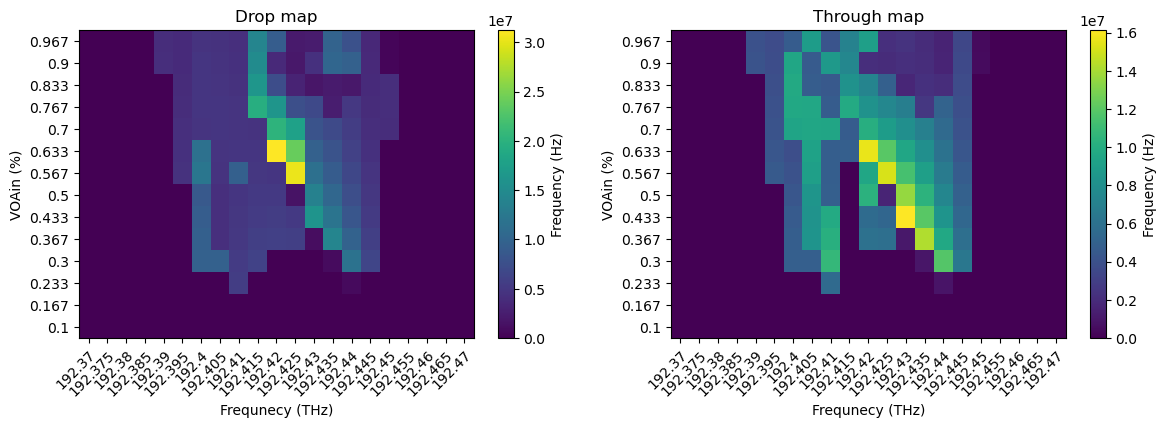

In [12]:
x = np.arange(1, len(freq_sweep) + 1, 1)
y = np.arange(1, len(pow_sweep) + 1, 1)
Z_dr = drop_frequency
Z_th = through_frequency

fig, ax = plt.subplots(1,2, figsize=[14, 4])

im_dr = ax[0].pcolormesh(x, y, Z_dr)
im_th = ax[1].pcolormesh(x, y, Z_th)

cbar_dr = fig.colorbar(im_dr)
cbar_th = fig.colorbar(im_th)

cbar_dr.ax.set_ylabel('Frequency (Hz)')
cbar_th.ax.set_ylabel('Frequency (Hz)')

title = ['Drop map', 'Through map']
for ii in [0,1]:
    ax[ii].set_xlabel('Frequnecy (THz)')
    x_label = np.round(freq_sweep, 3)
    ax[ii].set_xticks(np.arange(1,len(x_label)+1), labels=x_label)
    plt.setp(ax[ii].get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    ax[ii].set_ylabel('VOAin (%)')
    y_label = np.round(pow_sweep, 3)
    ax[ii].set_yticks(np.arange(1,len(y_label)+1), labels=y_label)

    ax[ii].set_title(title[ii])